# Notebook ICD - 21

tslearn is a Python package that provides machine learning tools for the analysis of time series. This package builds on (and hence depends on) scikit-learn, numpy and scipy libraries.

In [1]:
#pip install tslearn

## Dynamic Time Warping (DTW)

In [2]:
import numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from tslearn import metrics

In [3]:
numpy.random.seed(0)

s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564,
     -0.544, -0.529, -0.518, -0.509, -0.502, -0.494, -0.488, -0.482, -0.475,
     -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459,
     -0.458, -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090,
     0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683, 2.096, 2.510, 2.895,
     3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280,
     3.158, 3.038, 2.919, 2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821,
     1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361, 0.259,
     0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260,
     -0.293, -0.328, -0.359, -0.385, -0.413, -0.437, -0.458, -0.480, -0.498,
     -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568,
     -0.570, -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443,
     -0.402, -0.357, -0.308, -0.256, -0.200, -0.139, -0.073, -0.003, 0.066,
     0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209,
     0.186, 0.162, 0.139, 0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110,
     -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307, -0.320,
     -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299,
     -0.260, -0.217, -0.172, -0.128, -0.091, -0.060, -0.036, -0.022, -0.016,
     -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588,
     -0.600, -0.606, -0.607, -0.604, -0.598, -0.589, -0.577, -0.558, -0.531,
     -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176,
     -0.157, -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230,
     -0.256, -0.286, -0.318, -0.351, -0.383, -0.414, -0.442, -0.467, -0.489,
     -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557,
     -0.551, -0.542, -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469,
     -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429, -0.430, -0.435,
     -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535,
     -0.548, -0.567, -0.592, -0.622, -0.655, -0.690, -0.728, -0.764, -0.795,
     -0.815, -0.823, -0.821])

s_y1 = numpy.concatenate((s_x, s_x)).reshape((-1, 1))
s_y2 = numpy.concatenate((s_x, s_x[::-1])).reshape((-1, 1))
sz = s_y1.shape[0]

In [4]:
path, sim = metrics.dtw_path(s_y1, s_y2)

plt.figure(1, figsize=(8, 8))

# definitions for the axes
left, bottom = 0.01, 0.1
w_ts = h_ts = 0.2
left_h = left + w_ts + 0.02
width = height = 0.65
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

<Figure size 800x800 with 0 Axes>

/var/folders/38/w8zx9pw96ml6x9h41ms703nm0000gn/T/ipykernel_30259/3272258477.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


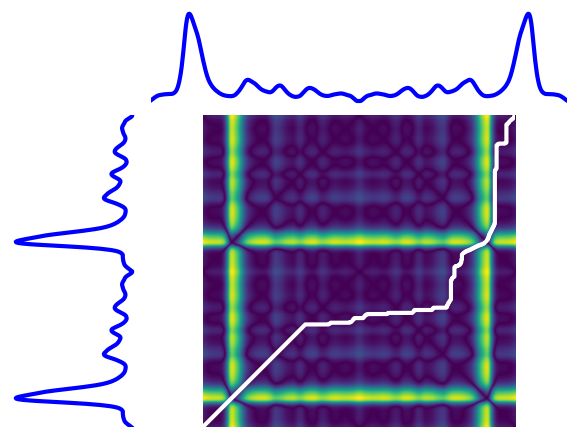

In [5]:
ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

mat = cdist(s_y1, s_y2)

ax_gram.imshow(mat, origin='lower')
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "w-",
             linewidth=3.)

ax_s_x.plot(numpy.arange(sz), s_y2, "b-", linewidth=3.)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

ax_s_y.plot(- s_y1, numpy.arange(sz), "b-", linewidth=3.)
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

plt.tight_layout()
plt.show()

## Soft Dynamic Time Warping (sDTW)

In [6]:
import numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from tslearn import metrics

In [7]:
numpy.random.seed(0)
s_x = numpy.array(
    [-0.790, -0.765, -0.734, -0.700, -0.668, -0.639, -0.612, -0.587, -0.564,
     -0.544, -0.529, -0.518, -0.509, -0.502, -0.494, -0.488, -0.482, -0.475,
     -0.472, -0.470, -0.465, -0.464, -0.461, -0.458, -0.459, -0.460, -0.459,
     -0.458, -0.448, -0.431, -0.408, -0.375, -0.333, -0.277, -0.196, -0.090,
     0.047, 0.220, 0.426, 0.671, 0.962, 1.300, 1.683, 2.096, 2.510, 2.895,
     3.219, 3.463, 3.621, 3.700, 3.713, 3.677, 3.606, 3.510, 3.400, 3.280,
     3.158, 3.038, 2.919, 2.801, 2.676, 2.538, 2.382, 2.206, 2.016, 1.821,
     1.627, 1.439, 1.260, 1.085, 0.917, 0.758, 0.608, 0.476, 0.361, 0.259,
     0.173, 0.096, 0.027, -0.032, -0.087, -0.137, -0.179, -0.221, -0.260,
     -0.293, -0.328, -0.359, -0.385, -0.413, -0.437, -0.458, -0.480, -0.498,
     -0.512, -0.526, -0.536, -0.544, -0.552, -0.556, -0.561, -0.565, -0.568,
     -0.570, -0.570, -0.566, -0.560, -0.549, -0.532, -0.510, -0.480, -0.443,
     -0.402, -0.357, -0.308, -0.256, -0.200, -0.139, -0.073, -0.003, 0.066,
     0.131, 0.186, 0.229, 0.259, 0.276, 0.280, 0.272, 0.256, 0.234, 0.209,
     0.186, 0.162, 0.139, 0.112, 0.081, 0.046, 0.008, -0.032, -0.071, -0.110,
     -0.147, -0.180, -0.210, -0.235, -0.256, -0.275, -0.292, -0.307, -0.320,
     -0.332, -0.344, -0.355, -0.363, -0.367, -0.364, -0.351, -0.330, -0.299,
     -0.260, -0.217, -0.172, -0.128, -0.091, -0.060, -0.036, -0.022, -0.016,
     -0.020, -0.037, -0.065, -0.104, -0.151, -0.201, -0.253, -0.302, -0.347,
     -0.388, -0.426, -0.460, -0.491, -0.517, -0.539, -0.558, -0.575, -0.588,
     -0.600, -0.606, -0.607, -0.604, -0.598, -0.589, -0.577, -0.558, -0.531,
     -0.496, -0.454, -0.410, -0.364, -0.318, -0.276, -0.237, -0.203, -0.176,
     -0.157, -0.145, -0.142, -0.145, -0.154, -0.168, -0.185, -0.206, -0.230,
     -0.256, -0.286, -0.318, -0.351, -0.383, -0.414, -0.442, -0.467, -0.489,
     -0.508, -0.523, -0.535, -0.544, -0.552, -0.557, -0.560, -0.560, -0.557,
     -0.551, -0.542, -0.531, -0.519, -0.507, -0.494, -0.484, -0.476, -0.469,
     -0.463, -0.456, -0.449, -0.442, -0.435, -0.431, -0.429, -0.430, -0.435,
     -0.442, -0.452, -0.465, -0.479, -0.493, -0.506, -0.517, -0.526, -0.535,
     -0.548, -0.567, -0.592, -0.622, -0.655, -0.690, -0.728, -0.764, -0.795,
     -0.815, -0.823, -0.821])

s_y1 = numpy.concatenate((s_x, s_x))[::2].reshape((-1, 1))
s_y2 = numpy.concatenate((s_x, s_x[::-1]))[::2].reshape((-1, 1))
sz = s_y1.shape[0]

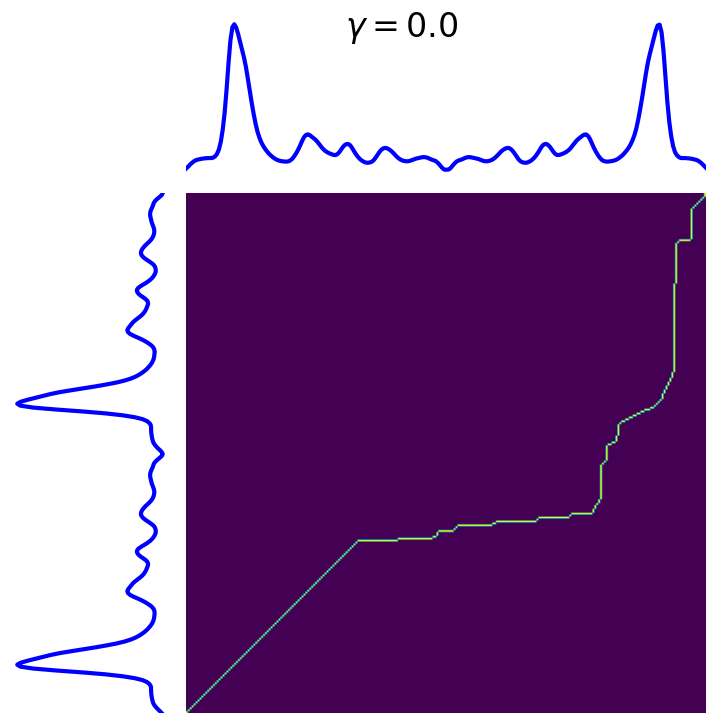

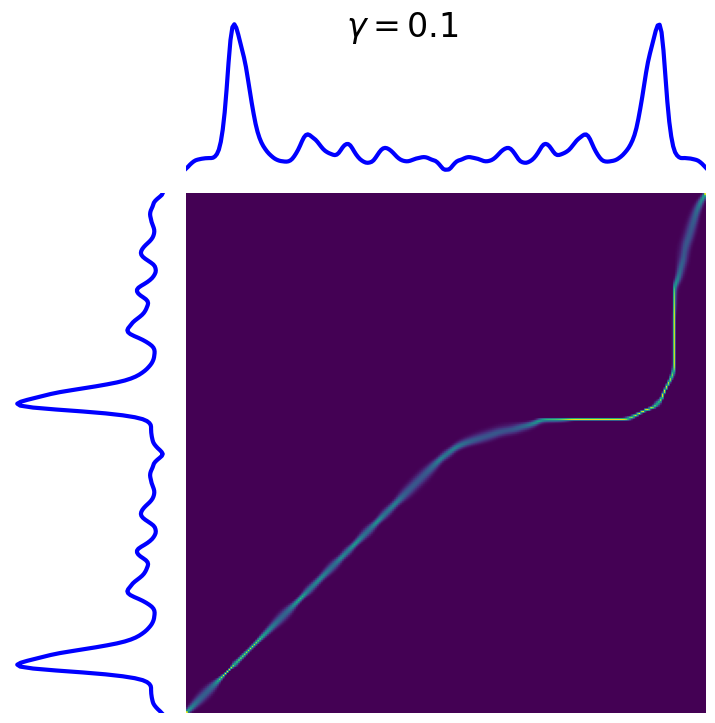

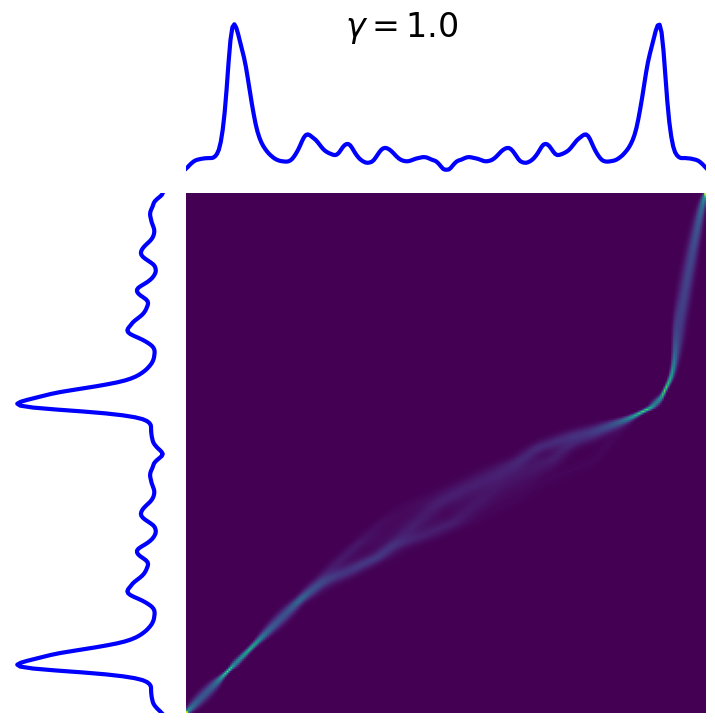

In [8]:
for gamma in [0., .1, 1.]:
    alignment, sim = metrics.soft_dtw_alignment(s_y1, s_y2, gamma=gamma)

    plt.figure(figsize=(8, 8))

    # definitions for the axes
    left, bottom = 0.01, 0.1
    w_ts = h_ts = 0.2
    left_h = left + w_ts + 0.02
    width = height = 0.65
    bottom_h = bottom + height + 0.02

    rect_s_y = [left, bottom, w_ts, height]
    rect_gram = [left_h, bottom, width, height]
    rect_s_x = [left_h, bottom_h, width, h_ts]

    ax_gram = plt.axes(rect_gram)
    ax_s_x = plt.axes(rect_s_x)
    ax_s_y = plt.axes(rect_s_y)

    mat = cdist(s_y1, s_y2)

    ax_gram.imshow(alignment, origin='lower')
    ax_gram.axis("off")
    ax_gram.autoscale(False)
    plt.suptitle("$\\gamma={:.1f}$".format(gamma), fontsize=24)

    ax_s_x.plot(numpy.arange(sz), s_y2, "b-", linewidth=3.)
    ax_s_x.axis("off")
    ax_s_x.set_xlim((0, sz - 1))

    ax_s_y.plot(- s_y1, numpy.arange(sz), "b-", linewidth=3.)
    ax_s_y.axis("off")
    ax_s_y.set_ylim((0, sz - 1))

    plt.show()

## Canonical Time Warping (CTW)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tslearn.metrics import dtw_path, ctw_path

In [10]:
def plot_trajectory(ts, ax, color_code=None, alpha=1.):
    if color_code is not None:
        colors = [color_code] * len(ts)
    else:
        colors = plt.cm.jet(np.linspace(0, 1, len(ts)))
    for i in range(len(ts) - 1):
        ax.plot(ts[i:i+2, 0], ts[i:i+2, 1],
                marker='o', c=colors[i], alpha=alpha)

def get_rot2d(theta):
    return np.array(
        [[np.cos(theta), -np.sin(theta)],
         [np.sin(theta), np.cos(theta)]]
    )

def make_one_folium(sz, a=1., noise=.1, resample_fun=None):
    theta = np.linspace(0, 1, sz)
    if resample_fun is not None:
        theta = resample_fun(theta)
    theta -= .5
    theta *= .9 * np.pi
    theta = theta.reshape((-1, 1))
    r = a / 2 * (4 * np.cos(theta) - 1. / np.cos(theta))
    x = r * np.cos(theta) + np.random.rand(sz, 1) * noise
    y = r * np.sin(theta) + np.random.rand(sz, 1) * noise
    return np.array(np.hstack((x, y)))

In [11]:
trajectory = make_one_folium(sz=30).dot(get_rot2d(np.pi + np.pi / 3))
rotated_trajectory = trajectory.dot(get_rot2d(np.pi / 4)) + np.array([0., 3.])

path_dtw, _ = dtw_path(trajectory, rotated_trajectory)

path_ctw, cca, _ = ctw_path(trajectory, rotated_trajectory,
                            max_iter=100, n_components=2)

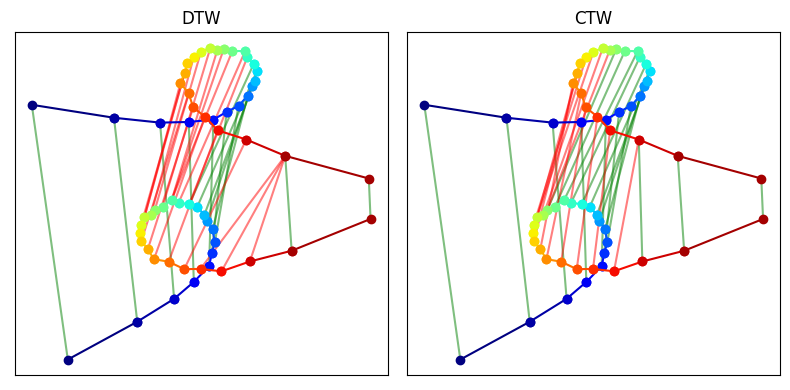

In [12]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
for (i, j) in path_dtw:
    ax.plot([trajectory[i, 0], rotated_trajectory[j, 0]],
            [trajectory[i, 1], rotated_trajectory[j, 1]],
            color='g' if i == j else 'r', alpha=.5)
plot_trajectory(trajectory, ax)
plot_trajectory(rotated_trajectory, ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("DTW")

ax = plt.subplot(1, 2, 2)
for (i, j) in path_ctw:
    ax.plot([trajectory[i, 0], rotated_trajectory[j, 0]],
            [trajectory[i, 1], rotated_trajectory[j, 1]],
            color='g' if i == j else 'r', alpha=.5)
plot_trajectory(trajectory, ax)
plot_trajectory(rotated_trajectory, ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("CTW")

plt.tight_layout()
plt.show()

## DTW from scratch

In [13]:
from numpy import array, zeros, argmin, inf
from numpy.linalg import norm

def dtw(x, y, dist=lambda x, y: norm(x - y, ord=1)):

    x = array(x)
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    y = array(y)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    r, c = len(x), len(y)

    D = zeros((r + 1, c + 1))
    D[0, 1:] = inf
    D[1:, 0] = inf

    for i in range(r):
        for j in range(c):
            D[i+1, j+1] = dist(x[i], y[j])

    for i in range(r):
        for j in range(c):
            D[i+1, j+1] += min(D[i, j], D[i, j+1], D[i+1, j])

    D = D[1:, 1:]

    dist = D[-1, -1] / sum(D.shape)

    return dist, D, _trackeback(D)


def _trackeback(D):
    i, j = array(D.shape) - 1
    p, q = [i], [j]
    while (i > 0 and j > 0):
        tb = argmin((D[i-1, j-1], D[i-1, j], D[i, j-1]))

        if (tb == 0):
            i = i - 1
            j = j - 1
        elif (tb == 1):
            i = i - 1
        elif (tb == 2):
            j = j - 1

        p.insert(0, i)
        q.insert(0, j)

    p.insert(0, 0)
    q.insert(0, 0)
    return (array(p), array(q))

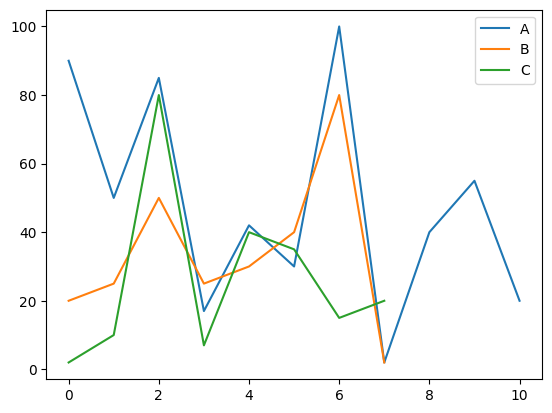

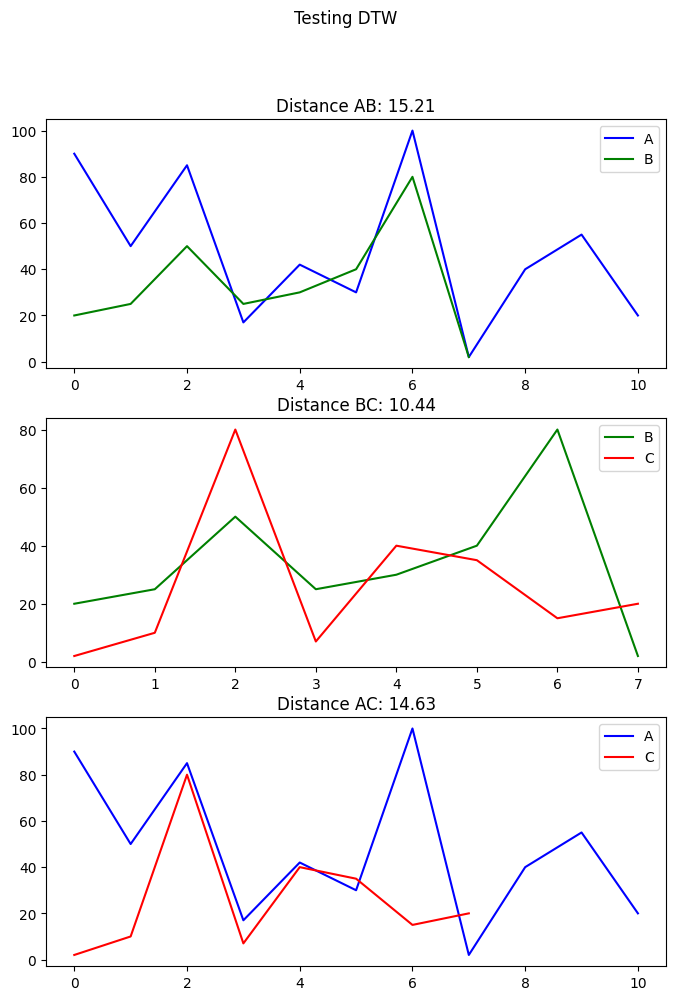

In [14]:
import numpy
import matplotlib.pyplot as plt

def plot_dtw():
    distAB,cAB,pAB = dtw(A, B)
    distBC,cBC,pBC  = dtw(B, C)
    distAC,cAC,pAC = dtw(A, C)

    fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(8,11))
    fig.suptitle('Testing DTW')
    ax1.set_title('Distance AB: ' + str(round(distAB,2)))
    ax1.plot(A, 'b')
    ax1.plot(B, 'g')
    ax1.legend(["A", "B"])
    ax2.set_title('Distance BC: ' + str(round(distBC,2)))
    ax2.plot(B, 'g')
    ax2.plot(C, 'r')
    ax2.legend(["B", "C"])
    ax3.set_title('Distance AC: ' + str(round(distAC,2)))
    ax3.plot(A, 'b')
    ax3.plot(C, 'r')
    ax3.legend(["A", "C"])
    plt.show()


#A = [10,11,12,13,14,15,16,17,18,19,20]
A = [90, 50, 85, 17, 42, 30, 100, 2, 40, 55, 20]
#B = [8,9,12,13,7]
B = [20, 25, 50, 25, 30, 40, 80, 2]
#C = [2,9,9,5,3]
C = [2, 10, 80, 7, 40, 35, 15, 20]

plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.legend(["A", "B", "C"])
plt.show()

plot_dtw()


## Example using fastDTW

In [15]:
#pip install fastdtw

In [16]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903
